<a href="https://colab.research.google.com/github/Gabriellemga/Python_Data_Science_Alura/blob/main/Series_temporais_detectando_anomalias_realizando_previsoes/M%C3%A3o_na_massa_s%C3%A9ries_temporaisipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Séries temporais: detectando anomalias e realizando previsões

# Mão na massa

Esse notebook contém diversas atividades envolvendo os aprendizados de cada aula. É um notebook construído com o enunciado de cada atividade e com espaço para construir e executar suas soluções. Se for necessário adicionar mais células de código para resolver a atividade, fique à vontade para acrescentar.

## Aula 1

### Atividade 1

A primeira tarefa em um projeto é o carregamento dos dados. Faça a leitura da base de dados utilizando a biblioteca `Pandas` e faça a transformação da coluna de data para o formato `datetime`, transferindo os dados para o índice do DataFrame.

In [ ]:
import pandas as pd

In [ ]:
dados = pd.read_csv('/content/Base de dados - Mão na massa.csv')

In [ ]:
dados.head()

,data,Sal Sinha,O Régano
0,1/1/2016,25.0,67.0
1,1/2/2016,39.0,43.0
2,1/3/2016,31.0,66.0
3,1/4/2016,18.0,NaN
4,1/5/2016,15.0,38.0


In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   data       478 non-null    object 
 1   Sal Sinha  476 non-null    float64
 2   O Régano   476 non-null    float64
dtypes: float64(2), object(1)
memory usage: 11.3+ KB


In [ ]:
dados['data'] = pd.to_datetime(dados['data'])
dados.set_index('data', inplace = True)

In [ ]:
dados.head()

,Sal Sinha,O Régano
data,,
2016-01-01,25.0,67.0
2016-01-02,39.0,43.0
2016-01-03,31.0,66.0
2016-01-04,18.0,NaN
2016-01-05,15.0,38.0


### Atividade 2

Depois de carregar os dados, chegou o momento de checar a consistência dos dados. Verifique a presença de dados nulos e faça os tratamentos necessários.

In [ ]:
dados['Sal Sinha'][dados['Sal Sinha'].isnull()]

,Sal Sinha
data,
2016-05-28,NaN
2016-08-24,NaN


In [ ]:
dados['O Régano'][dados['O Régano'].isnull()]

,O Régano
data,
2016-01-04,NaN
2017-04-18,NaN


In [ ]:
dados = dados.interpolate()

In [ ]:
dados = dados.astype(int)

### Atividade 3

Com a base de dados totalmente tratada, chegou o momento de começar as análises. Utilize gráficos de distribuição e boxplot para responder às seguintes perguntas:
- Qual é a quantidade mais frequente de clientes nos restaurantes?
- Qual a quantidade mínima e máxima de clientes que frequentaram os restaurantes?
- Existem dados discrepantes, com um padrão muito distante da maior parte dos dados?


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

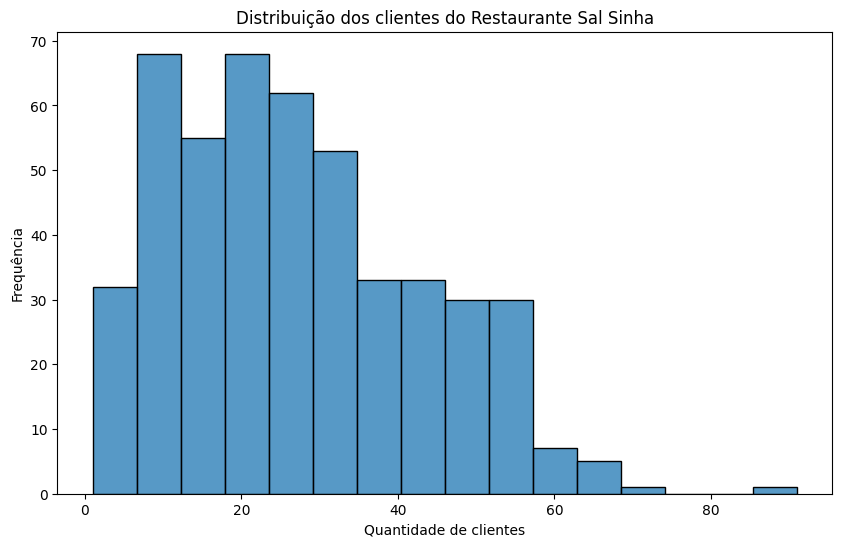

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(dados['Sal Sinha'])
plt.title('Distribuição dos clientes do Restaurante Sal Sinha')
plt.xlabel('Quantidade de clientes')
plt.ylabel('Frequência')
plt.show()

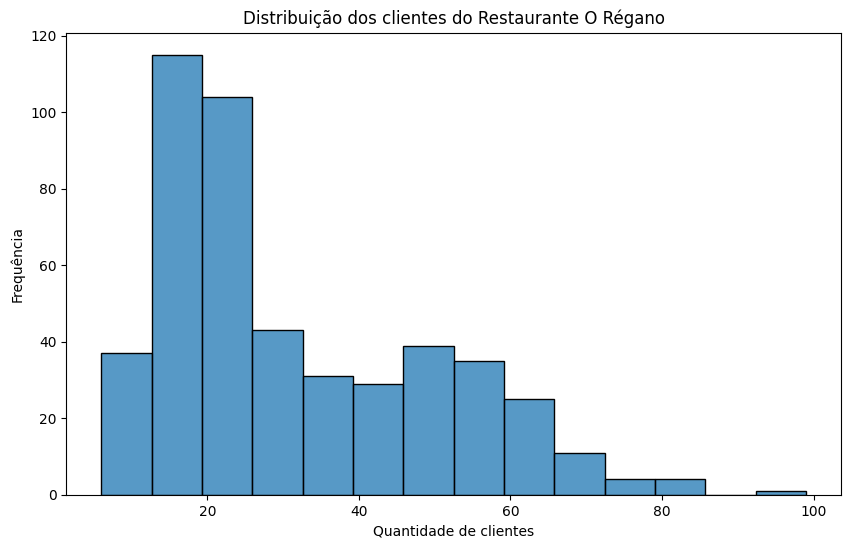

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(dados['O Régano'])
plt.title('Distribuição dos clientes do Restaurante O Régano')
plt.xlabel('Quantidade de clientes')
plt.ylabel('Frequência')
plt.show()

In [ ]:
dados.describe()

,Sal Sinha,O Régano
count,478.000000,478.000000
mean,27.096234,31.619247
std,15.723340,17.825541
min,1.000000,6.000000
25%,15.000000,18.000000
50%,25.000000,24.000000
75%,38.000000,45.000000
max,91.000000,99.000000


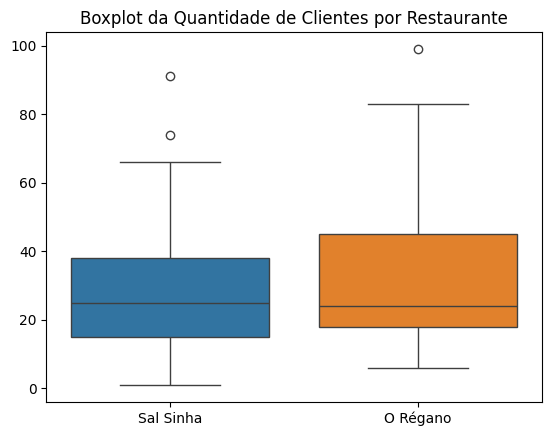

In [ ]:
sns.boxplot(dados)
plt.title('Boxplot da Quantidade de Clientes por Restaurante')
plt.show()

Podemos perceber que a quantidade mais frequente de clientes para o restaurante Sal Sinha é de 20 a 30 clientes a partir do histograma.

Podemos perceber que a quantidade mais frequente de clientes para o restaurante O Régano é de 15 a 25 clientes a partir do histograma.

A partir do describe(), podemos identificar que o valor mínimo de clientes para os restaurantes Sal Sinha e O Régano são, respectivamente 1 e 6. Enquanto os valores máximos são 91 e 99.

Conseguimos identificar a partir do boxplot que há 2 círculos acima do limite superior no boxplot do restaurante Sal Sina e 1 círculo acima do limite superior no boxplot do restaurante O Régano. Desse modo, existem valores discrepantes na nossa base de dados e que precisam ser analisados posteriormente.

## Aula 2

### Atividade 1

Para compreender melhor o comportamento da quantidade de clientes da rede de restaurantes, é preciso calcular o total de clientes dos dois restaurantes. Nesta tarefa, realize a soma das séries temporais dos dois restaurantes e responda às seguintes perguntas:
- Qual é a quantidade de clientes mais frequente e menos frequente da rede de restaurantes?
- Qual é a quantidade mínima e máxima de clientes que frequentaram a rede de restaurantes?


In [ ]:
dados['Total'] = dados.sum(axis=1)

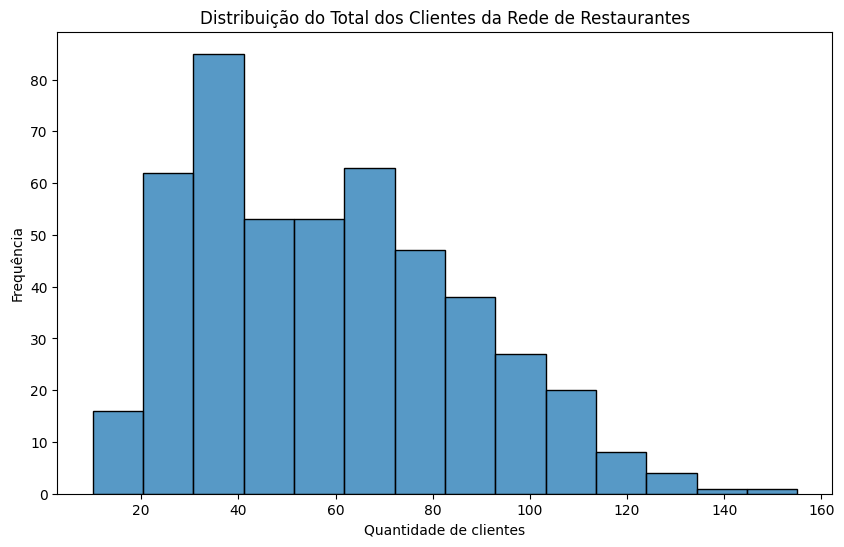

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(dados['Total'])
plt.title('Distribuição do Total dos Clientes da Rede de Restaurantes')
plt.xlabel('Quantidade de clientes')
plt.ylabel('Frequência')
plt.show()

In [ ]:
dados.describe()

,Sal Sinha,O Régano,Total
count,478.000000,478.000000,478.000000
mean,27.096234,31.619247,58.715481
std,15.723340,17.825541,27.415711
min,1.000000,6.000000,10.000000
25%,15.000000,18.000000,36.000000
50%,25.000000,24.000000,56.000000
75%,38.000000,45.000000,78.000000
max,91.000000,99.000000,155.000000


A partir do histograma, podemos perceber que a quantidade de clientes mais frequente é por volta de 30 a 40 clientes, enquanto a quantidade menos frequente se dá entre 140 a 160 clientes.

A partir da tabela, conseguimos obter que a quantidade mínima de clientes foi de 10 e a quantidade máxima foi de 155.

### Atividade 2

Para verificar como anda o negócio ao longo do ano, é preciso agregar os dados em um período de tempo maior. Nesta atividade, agrupe os dados com base no mês e construa um gráfico de barras empilhado que mostre a quantidade de clientes total para cada mês.

In [ ]:
clientes_mensais = dados.resample(rule = 'ME')[['Sal Sinha',	'O Régano']].sum()

In [ ]:
clientes_mensais['Mês'] = clientes_mensais.index.month_name(locale = 'pt_BR.utf8')

In [ ]:
import matplotlib.ticker as ticker

/tmp/ipython-input-1570925193.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_minor_formatter(ticker.FixedFormatter(['\n\n2016', '\n\n2017']));


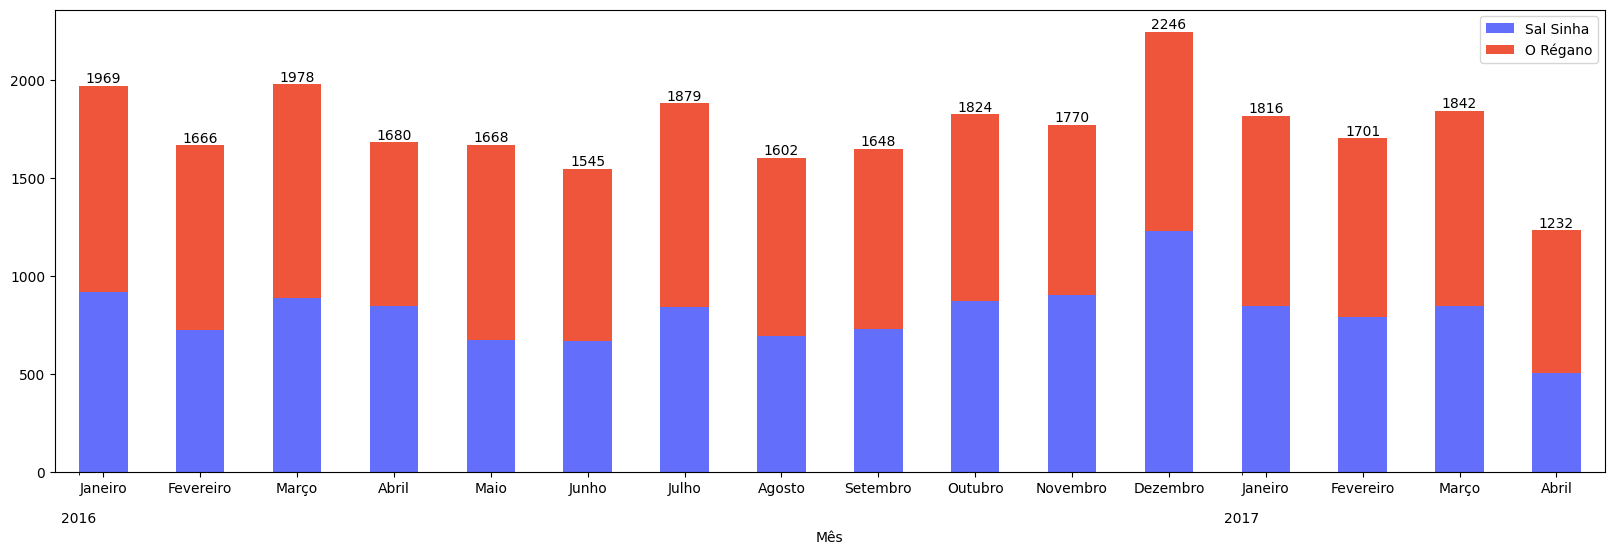

In [ ]:
ax = clientes_mensais.plot(x = 'Mês', kind = 'bar', stacked = True, color = ['#636EFA', '#EF553B'], rot = 0, figsize = (20,6))
ax.bar_label(ax.containers[1], fontsize = 10)
ax.xaxis.set_minor_locator(ticker.IndexLocator(12, 0))
ax.xaxis.set_minor_formatter(ticker.FixedFormatter(['\n\n2016', '\n\n2017']));

In [ ]:
#!sudo apt-get install language-pack-pt-base

### Atividade 3

Para entender melhor o comportamento de crescimento e decrescimento dos clientes ao longo do tempo, é necessário fazer uma suavização da série temporal. Utilize a média móvel simples de 7 dias para entender o comportamento de tendência das séries temporais dos dois restaurantes, criando um gráfico de comparação entre a série temporal original e a média móvel.


In [ ]:
for restaurante in ['Sal Sinha', 'O Régano']:
    dados[f'{restaurante}_MM7'] = dados[[restaurante]].rolling(7).mean()

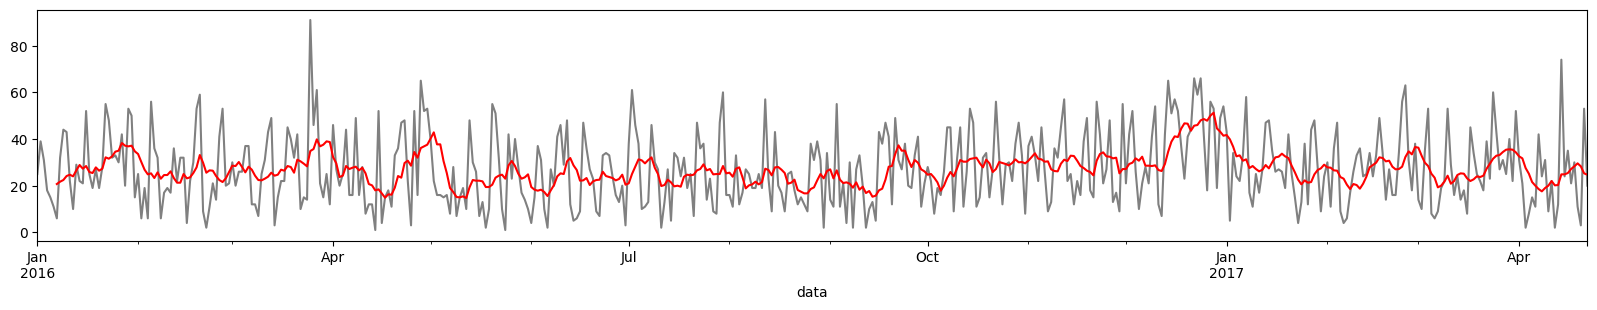

In [ ]:
dados['Sal Sinha'].plot(color = 'gray', figsize = (20,3))
dados['Sal Sinha_MM7'].plot(color = 'red', figsize = (20,3));

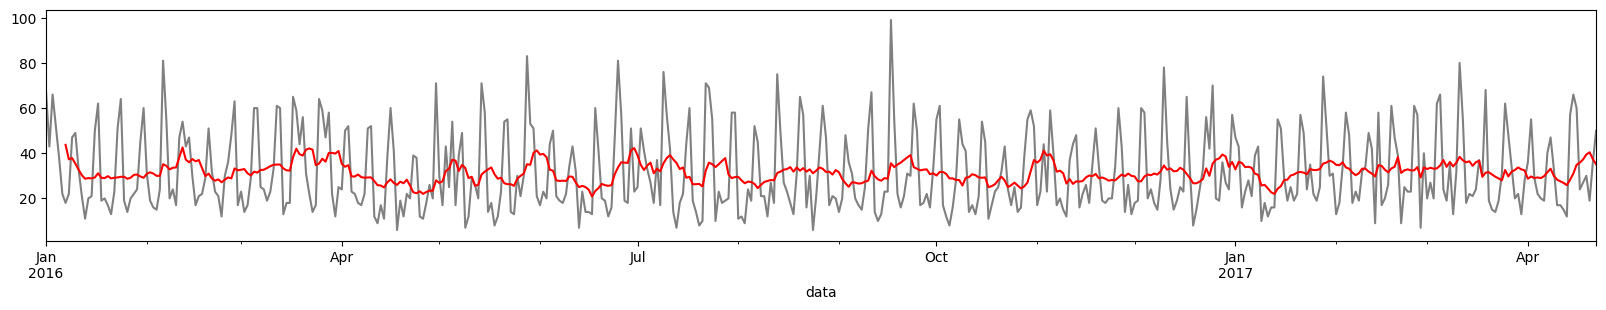

In [ ]:
dados['O Régano'].plot(color = 'gray', figsize = (20,3))
dados['O Régano_MM7'].plot(color = 'red', figsize = (20,3));

## Aula 3

### Atividade 1

Para encontrar em quais datas ocorreram valores discrepantes, precisamos encontrar o nome do dia da semana e entender se ocorreram em datas comemorativas. Crie uma nova coluna na base de dados contendo o nome do dia da semana e agrupe os dados com as datas comemorativas.

Obs: Para resolver esse desafio, é necessário utilizar a base de dados contendo as datas comemorativas.


In [ ]:
datas_comemorativas = pd.read_csv('/content/datas_comemorativas.csv')
datas_comemorativas['data'] = pd.to_datetime(datas_comemorativas['data'])
datas_comemorativas = datas_comemorativas.set_index('data', drop = True)
datas_comemorativas.head()

,feriado
data,
2016-01-01,Ano novo
2016-02-14,Dia dos namorados
2016-03-25,Sexta-feira santa
2016-03-27,Pascoa
2016-03-28,Domingo de pascoa


In [ ]:
dados['Dia da semana'] = dados.index.day_name(locale = 'pt_BR.utf8')
dados = dados.join(datas_comemorativas, how = 'left')
dados

,Sal Sinha,O Régano,Total,Sal Sinha_MM7,O Régano_MM7,Dia da semana,feriado
data,,,,,,,
2016-01-01,25,67,92,NaN,NaN,Sexta,Ano novo
2016-01-02,39,43,82,NaN,NaN,Sábado,NaN
2016-01-03,31,66,97,NaN,NaN,Domingo,NaN
2016-01-04,18,52,70,NaN,NaN,Segunda,NaN
2016-01-05,15,38,53,NaN,NaN,Terça,NaN
...,...,...,...,...,...,...,...
2017-04-18,30,27,57,28.285714,37.285714,Terça,NaN
2017-04-19,11,30,41,29.571429,39.428571,Quarta,NaN
2017-04-20,3,19,22,28.285714,40.428571,Quinta,NaN


### Atividade 2

Para detectar pontos de anomalia nos dados, é necessário encontrar valores muito distantes da média usando o método `zscore`. Importe o método `zscore` da biblioteca `scipy`, crie uma função para detectar valores discrepantes com método zscore e detecte os pontos de anomalia nos dados.

In [ ]:
from scipy.stats import zscore

In [ ]:
def detectar_anomalias(coluna):
    dados['zscore'] = zscore(dados[coluna])
    anomalias = dados[(dados['zscore']>3) | (dados['zscore']<-3)]
    return anomalias[[coluna, 'zscore', 'Dia da semana', 'feriado']]

In [ ]:
anomalias_sal_sinha = detectar_anomalias('Sal Sinha')
anomalias_o_regano = detectar_anomalias('O Régano')

### Atividade 3

Para visualizar os pontos de anomalia de dados, podemos nos recorrer a gráficos e tabelas. Construa um gráfico de linhas da série temporal de quantidade de clientes com pontos de destaque para as anomalias e apresente uma tabela completa com os dados discrepantes contendo data e nome do dia da semana da anomalia.

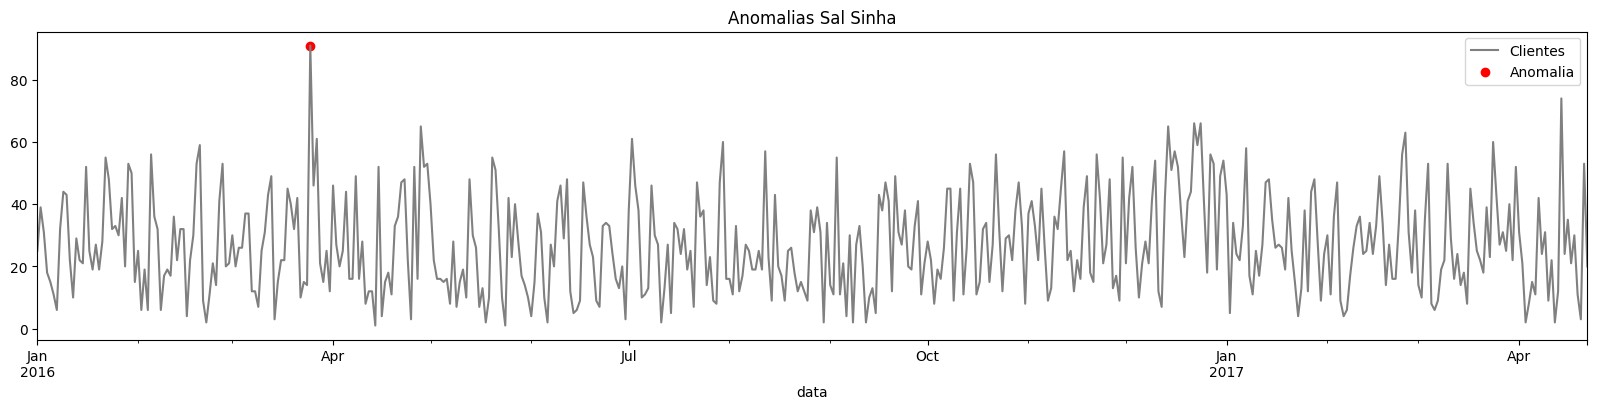

In [ ]:
ax = dados['Sal Sinha'].plot(label = 'Clientes', color = 'gray', figsize = (20,4))
ax.scatter(anomalias_sal_sinha.index.to_pydatetime(), anomalias_sal_sinha['Sal Sinha'], color = 'red', label = 'Anomalia')
ax.set_title('Anomalias Sal Sinha')
ax.legend();

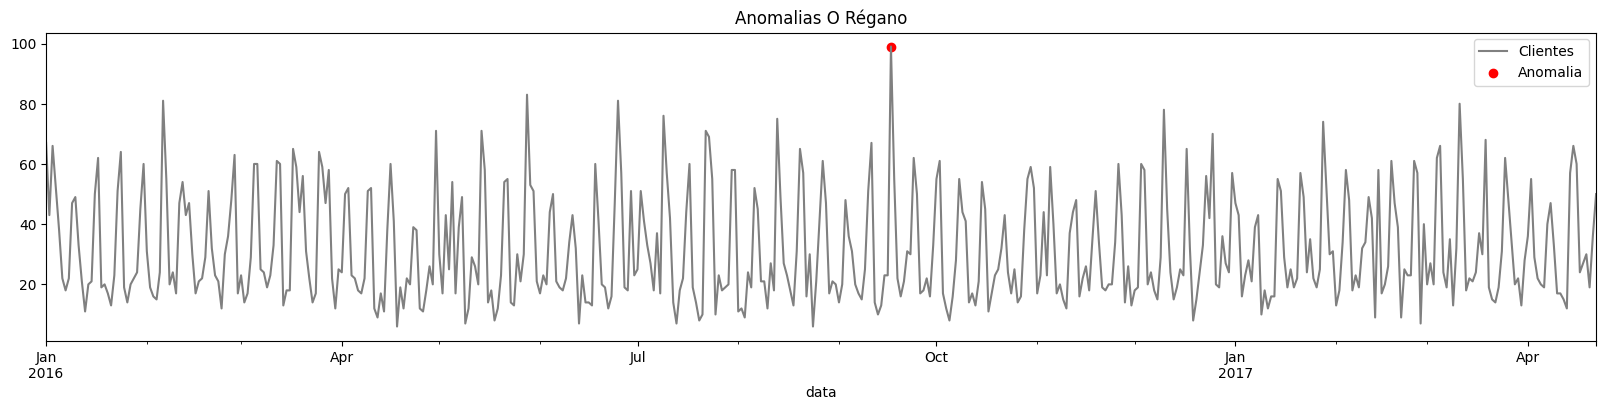

In [ ]:
ax = dados['O Régano'].plot(label = 'Clientes', color = 'gray', figsize = (20,4))
ax.scatter(anomalias_o_regano.index.to_pydatetime(), anomalias_o_regano['O Régano'], color = 'red', label = 'Anomalia')
ax.set_title('Anomalias O Régano')
ax.legend();

In [ ]:
print('Anomalias para o Sal Sinha')
display(anomalias_sal_sinha)
print('\n\n')
print('Anomalias para o O Régano')
display(anomalias_o_regano)

Anomalias para o Sal Sinha


,Sal Sinha,zscore,Dia da semana,feriado
data,,,,
2016-03-25,91,4.068519,Sexta,Sexta-feira santa





Anomalias para o O Régano


,O Régano,zscore,Dia da semana,feriado
data,,,,
2016-09-17,99,3.783972,Sábado,NaN


## Aula 4

### Atividade 1

Para identificar padrões sazonais na série temporal, podemos utilizar gráficos de autocorrelação, que medem a relação da série temporal com ela mesma, defasada em um determinado período de tempo. Crie gráficos de autocorrelação e autocorrelação parcial para cada um dos restaurantes, indicando se há algum padrão de sazonalidade existente nos dados.

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

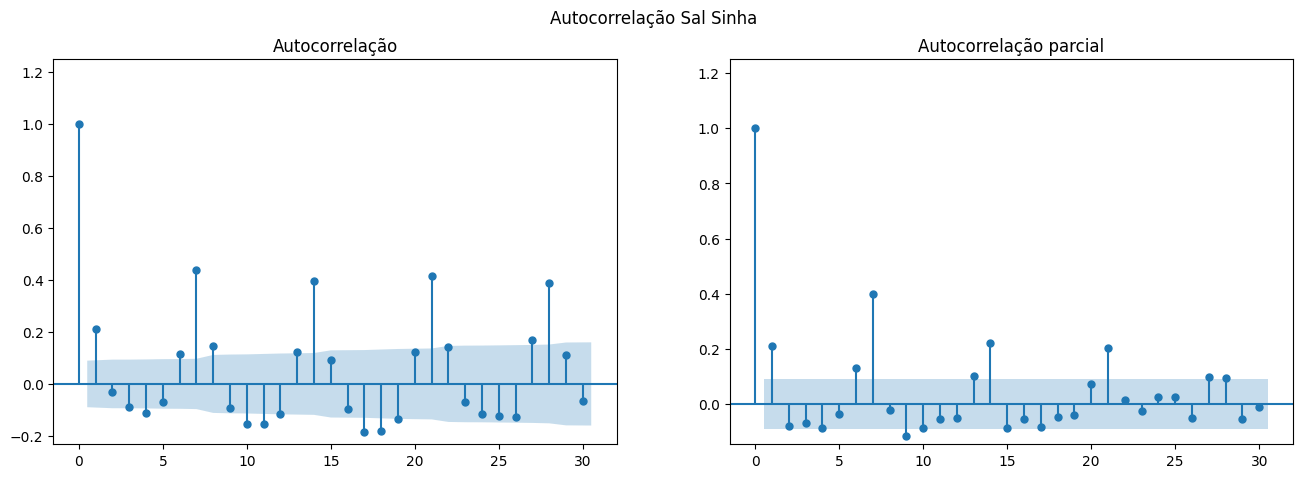

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (16,5))
plot_acf(dados['Sal Sinha'], lags = 30, title = 'Autocorrelação', auto_ylims = True, ax = axes[0])
plot_pacf(dados['Sal Sinha'], lags = 30, title = 'Autocorrelação parcial', auto_ylims = True, ax = axes[1])
plt.suptitle('Autocorrelação Sal Sinha');

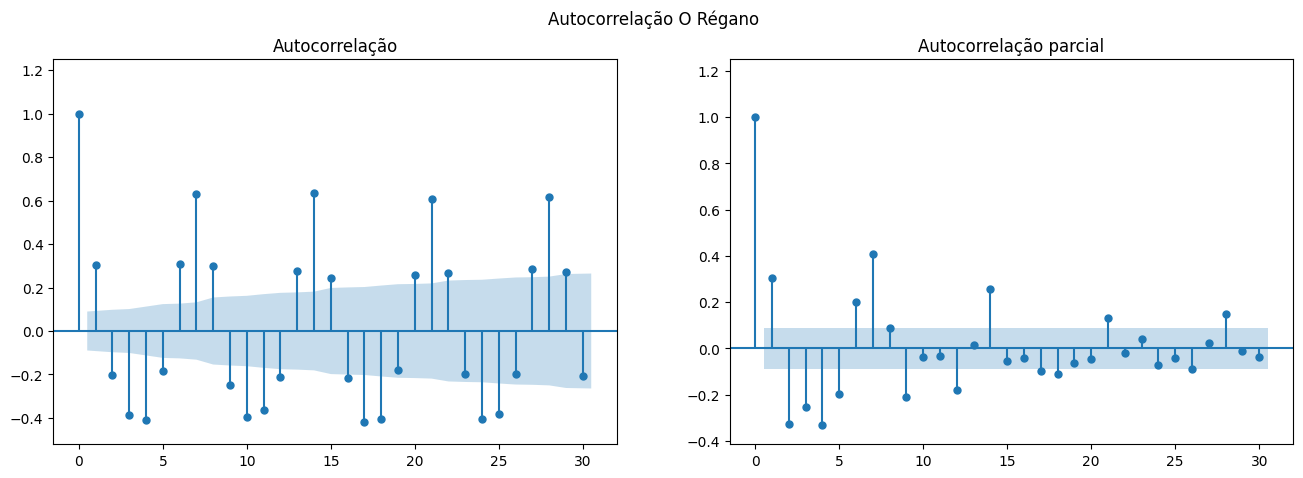

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (16,5))
plot_acf(dados['O Régano'], lags = 30, title = 'Autocorrelação', auto_ylims = True, ax = axes[0])
plot_pacf(dados['O Régano'], lags = 30, title = 'Autocorrelação parcial', auto_ylims = True, ax = axes[1])
plt.suptitle('Autocorrelação O Régano');

### Atividade 2

No intuito de compreender melhor o padrão dos dados, podemos fazer a decomposição de uma série temporal para checar tendências de crescimento/decrescimento, padrões repetitivos e ruídos inicialmente sem explicação. Utilize a biblioteca [`statsmodels`](https://www.statsmodels.org/stable/index.html) para realizara a decomposição dos dados dos dois restaurantes e crie uma função para apresentar essa decomposição a partir de um gráfico.

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
def plot_decomposicao(decomposicao, title):
    fig, axes = plt.subplots(ncols = 1, nrows = 4, sharex=True,figsize = (20, 8))
    decomposicao.observed.plot(ax = axes[0], title = 'Dados observados')
    decomposicao.trend.plot(ax = axes[1], title = 'Tendência')
    decomposicao.seasonal.plot(ax = axes[2], title = 'Sazonalidade')
    decomposicao.resid.plot(ax = axes[3], title = 'Resíduos')
    fig.suptitle(title)
    plt.show()

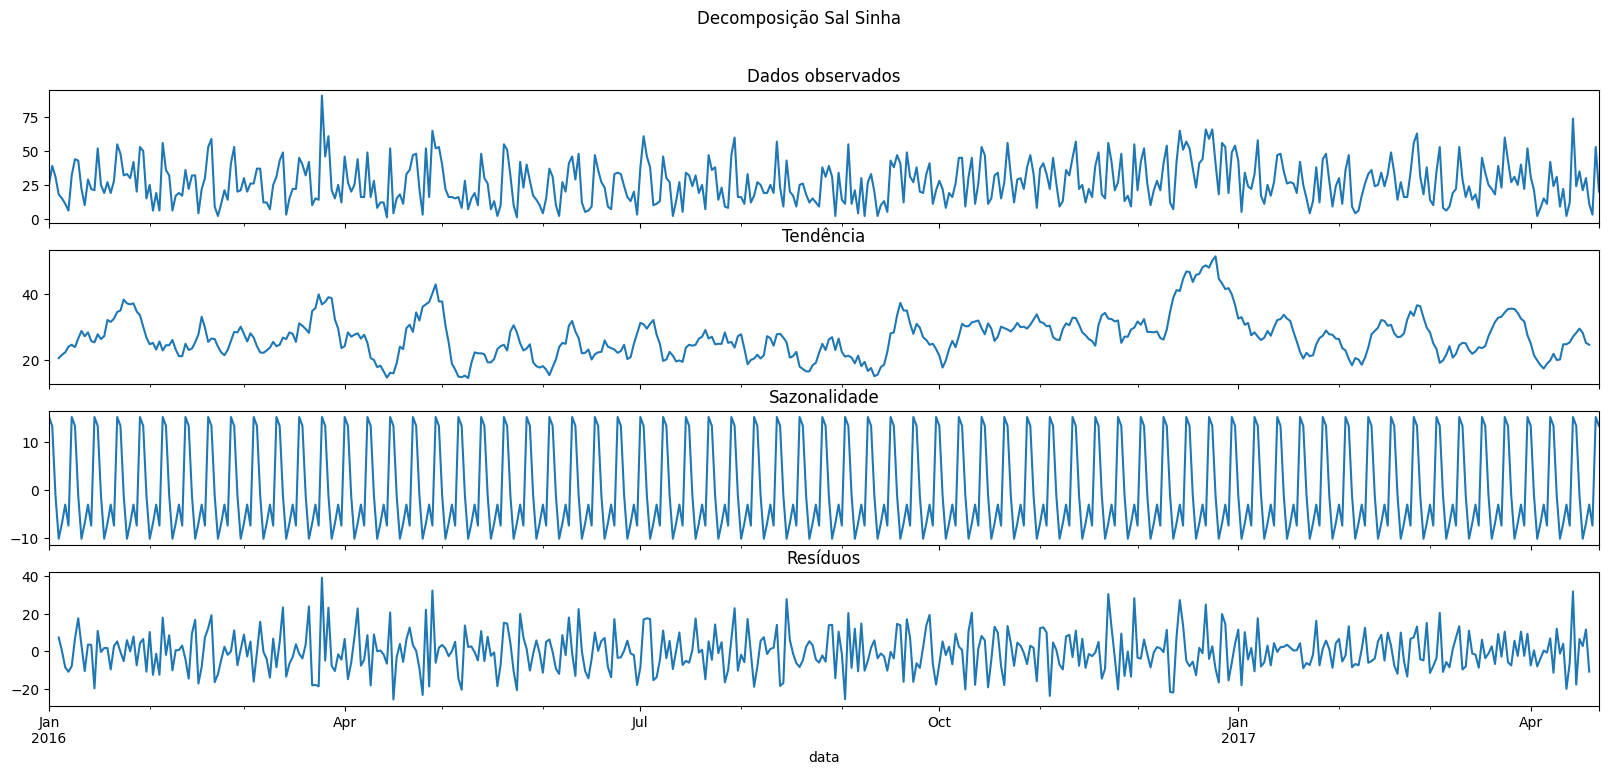

In [ ]:
decomposicao_sal_sinha = seasonal_decompose(dados['Sal Sinha'])
plot_decomposicao(decomposicao_sal_sinha, 'Decomposição Sal Sinha')

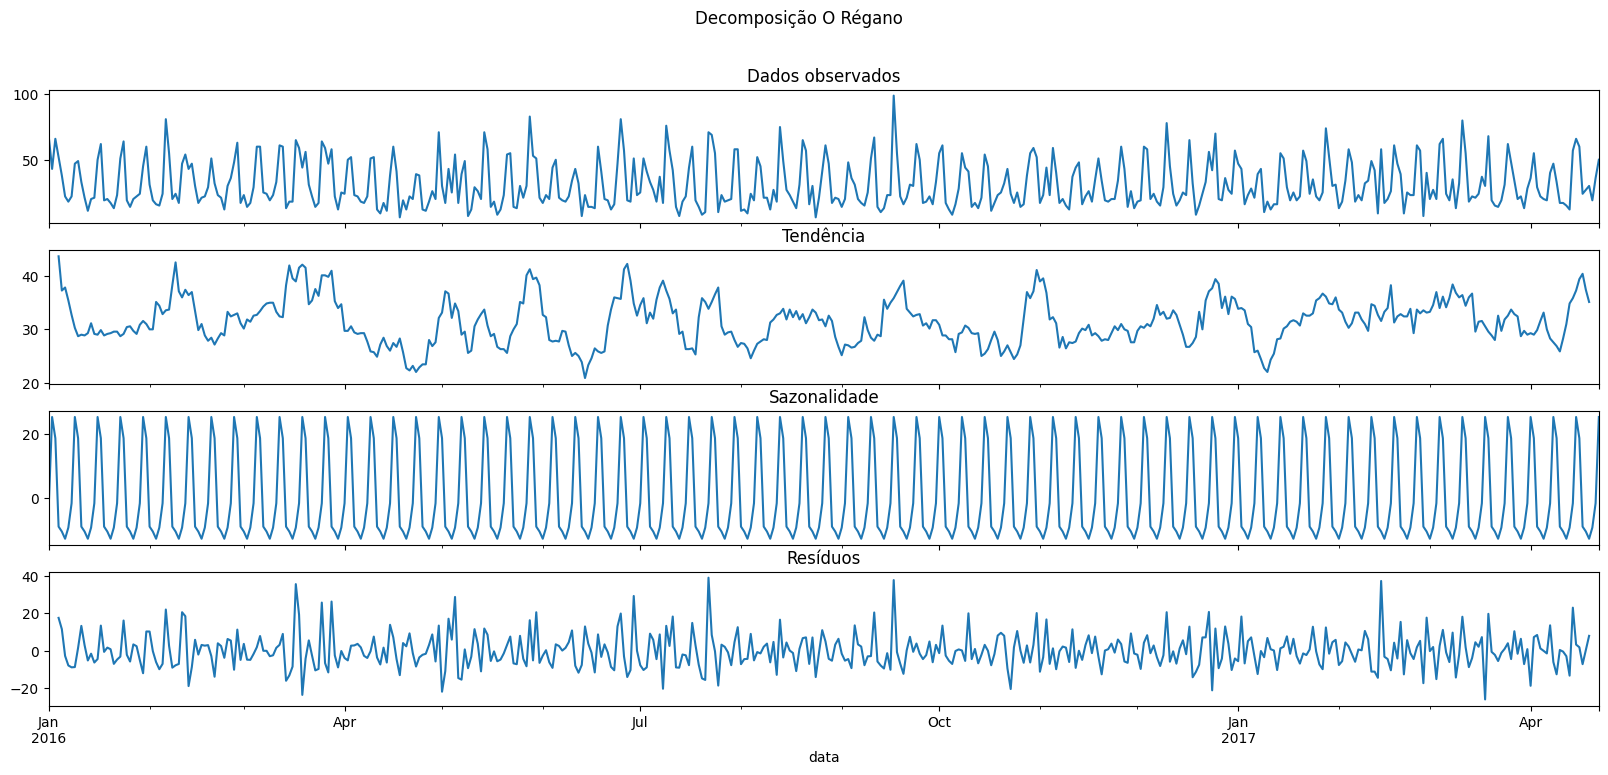

In [ ]:
decomposicao_o_regano = seasonal_decompose(dados['O Régano'])
plot_decomposicao(decomposicao_o_regano, 'Decomposição O Régano')

### Atividade 3

Os ruídos podem esconder informações valiosas para o negócio, uma vez que apresentam condições de mudança no padrão dos dados que podem ser explicadas por algum fenômeno que aconteceu no período específico da análise. Utilize os resíduos da decomposição para encontrar pontos de anomalia presentes nos dados, adicionando a informação no gráfico de decomposição e criando uma tabela contendo as datas específicas das anomalias.

In [ ]:
import numpy as np
anomalias_resid_sal_sinha = np.where(np.abs(decomposicao_sal_sinha.resid) > 2.5*np.std(decomposicao_sal_sinha.resid))
anomalias_resid_sal_sinha = dados.iloc[anomalias_resid_sal_sinha][['Sal Sinha', 'Dia da semana', 'feriado']]

/tmp/ipython-input-3266525126.py:3: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  axes[0].plot(anomalias_resid_sal_sinha.index, anomalias_resid_sal_sinha['Sal Sinha'], color = 'red', marker = 'o', linestyle = '', label = 'Anomalias')


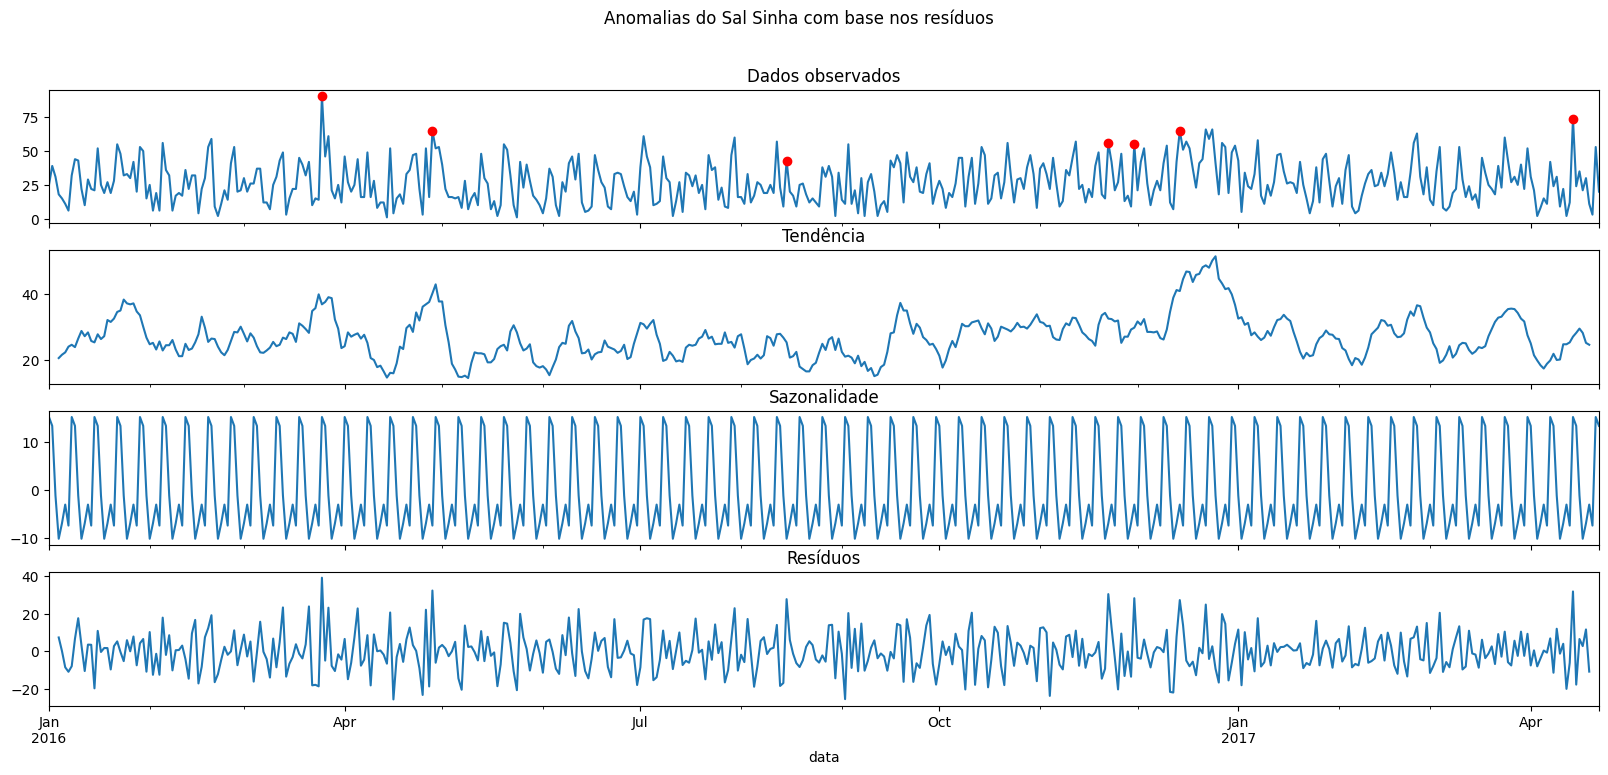

In [ ]:
fig, axes = plt.subplots(ncols = 1, nrows = 4, sharex=True,figsize = (20, 8))
decomposicao_sal_sinha.observed.plot(ax = axes[0], title = 'Dados observados')
axes[0].plot(anomalias_resid_sal_sinha.index, anomalias_resid_sal_sinha['Sal Sinha'], color = 'red', marker = 'o', linestyle = '', label = 'Anomalias')
decomposicao_sal_sinha.trend.plot(ax = axes[1], title = 'Tendência')
decomposicao_sal_sinha.seasonal.plot(ax = axes[2], title = 'Sazonalidade')
decomposicao_sal_sinha.resid.plot(ax = axes[3], title = 'Resíduos')
fig.suptitle('Anomalias do Sal Sinha com base nos resíduos')
plt.show()

In [ ]:
anomalias_resid_sal_sinha

,Sal Sinha,Dia da semana,feriado
data,,,
2016-03-25,91,Sexta,Sexta-feira santa
2016-04-28,65,Quinta,NaN
2016-08-15,43,Segunda,NaN
2016-11-22,56,Terça,NaN
2016-11-30,55,Quarta,NaN
2016-12-14,65,Quarta,NaN
2017-04-14,74,Sexta,Sexta-feira santa


In [ ]:
anomalias_resid_o_regano = np.where(np.abs(decomposicao_o_regano.resid) > 2.5*np.std(decomposicao_o_regano.resid))
anomalias_resid_o_regano = dados.iloc[anomalias_resid_o_regano][['O Régano', 'Dia da semana', 'feriado']]

/tmp/ipython-input-2113800462.py:3: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  axes[0].plot(anomalias_resid_o_regano.index, anomalias_resid_o_regano['O Régano'], color = 'red', marker = 'o', linestyle = '', label = 'Anomalias')


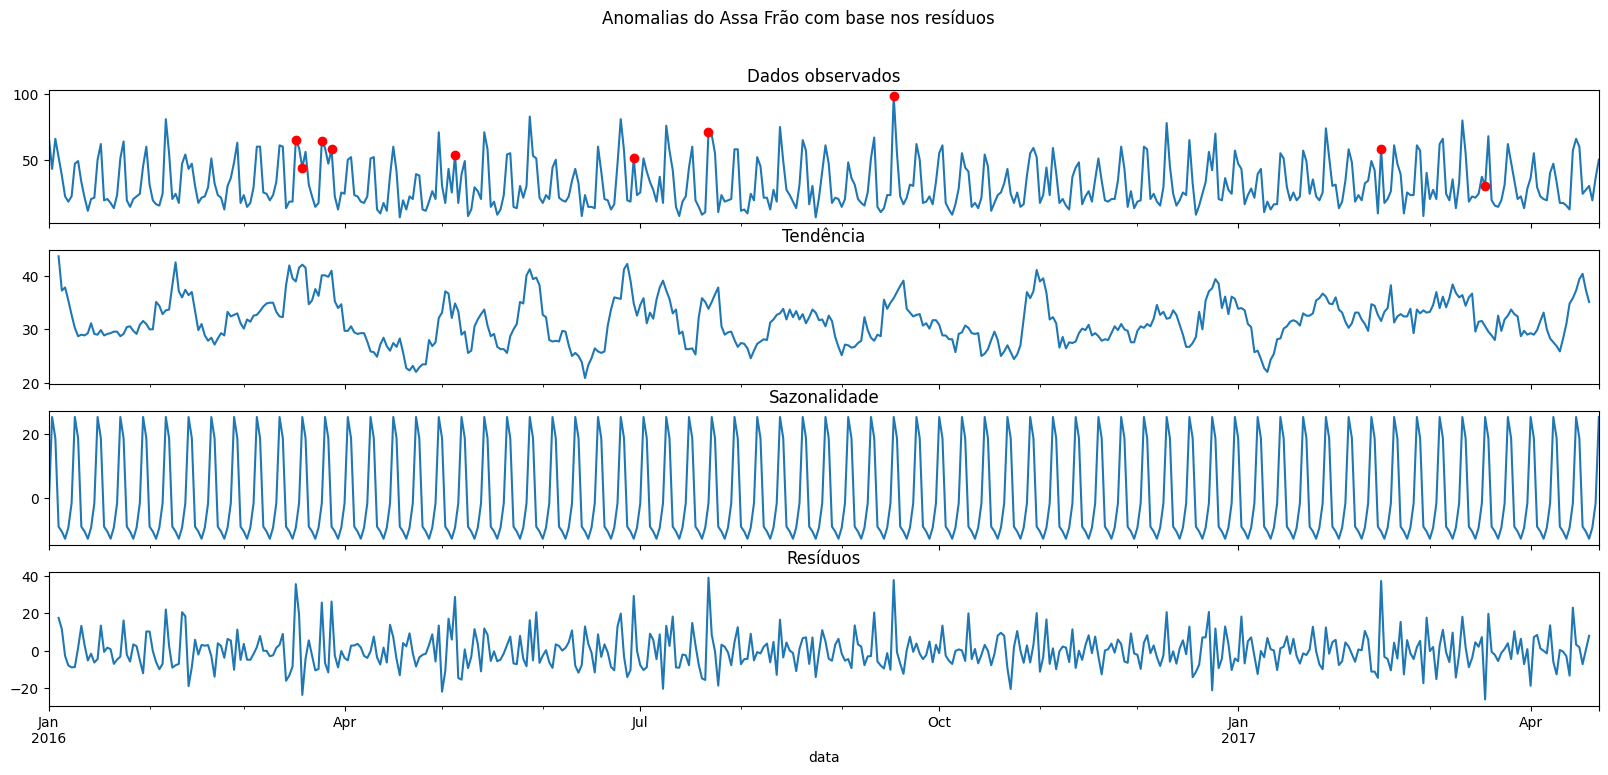

In [ ]:
fig, axes = plt.subplots(ncols = 1, nrows = 4, sharex=True,figsize = (20, 8))
decomposicao_o_regano.observed.plot(ax = axes[0], title = 'Dados observados')
axes[0].plot(anomalias_resid_o_regano.index, anomalias_resid_o_regano['O Régano'], color = 'red', marker = 'o', linestyle = '', label = 'Anomalias')
decomposicao_o_regano.trend.plot(ax = axes[1], title = 'Tendência')
decomposicao_o_regano.seasonal.plot(ax = axes[2], title = 'Sazonalidade')
decomposicao_o_regano.resid.plot(ax = axes[3], title = 'Resíduos')
fig.suptitle('Anomalias do Assa Frão com base nos resíduos')
plt.show()

In [ ]:
anomalias_resid_o_regano

,O Régano,Dia da semana,feriado
data,,,
2016-03-17,65,Quinta,NaN
2016-03-19,44,Sábado,NaN
2016-03-25,64,Sexta,Sexta-feira santa
2016-03-28,58,Segunda,Domingo de pascoa
2016-05-05,54,Quinta,NaN
2016-06-29,51,Quarta,NaN
2016-07-22,71,Sexta,NaN
2016-09-17,99,Sábado,NaN
2017-02-14,58,Terça,Dia dos namorados


## Aula 5

### Atividade 1

A previsão de valores futuros é uma das tarefas mais interessantes em análise de séries temporais, permitindo a extração de insights a partir de modelos estatísticos que examinam o padrão dos dados. Faça o treinamento de um modelo de previsão de Holt Winters a partir dos dados dos restaurantes e utilize um gráfico para representar os resultados.

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [ ]:
modelo_sal_sinha = ExponentialSmoothing(dados['Sal Sinha'], seasonal = 'additive', seasonal_periods = 7, freq = 'D').fit()
previsao_sal_sinha = modelo_sal_sinha.forecast(steps = 14)

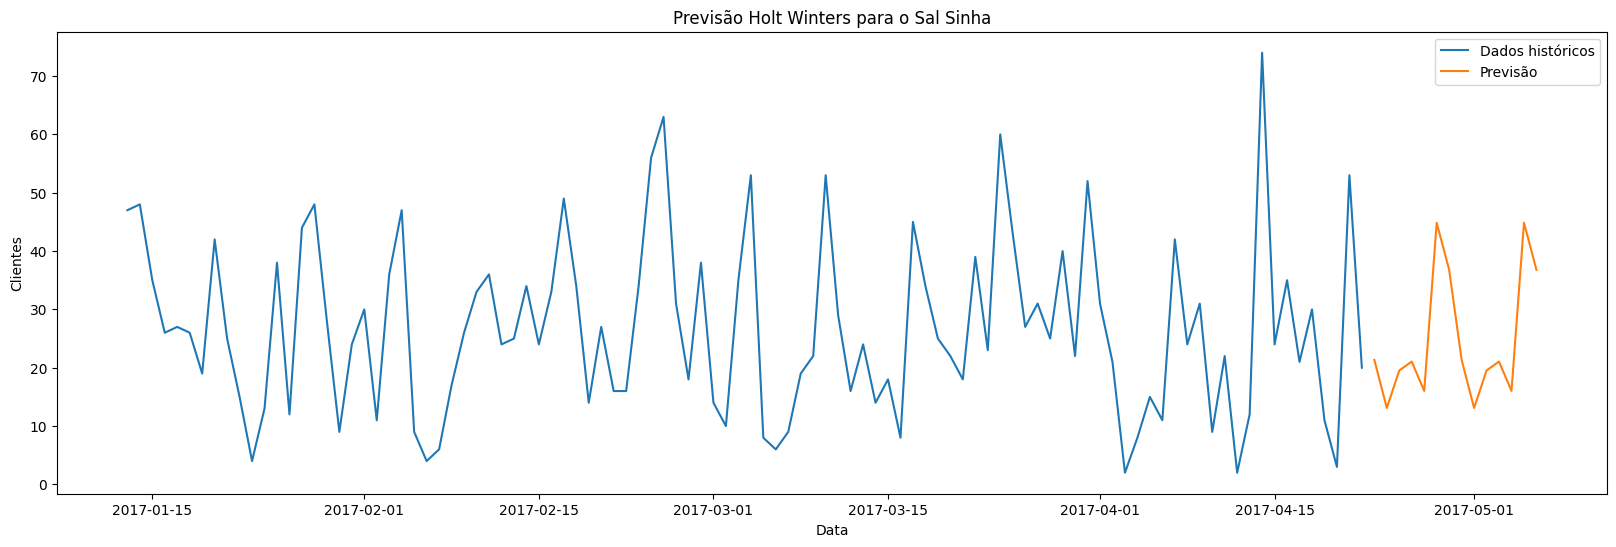

In [ ]:
plt.figure(figsize = (20,6))
plt.plot(dados['Sal Sinha'].index[-100:], dados['Sal Sinha'].values[-100:], label = 'Dados históricos')
plt.plot(previsao_sal_sinha.index, previsao_sal_sinha.values, label = 'Previsão')
plt.title('Previsão Holt Winters para o Sal Sinha')
plt.xlabel('Data')
plt.ylabel('Clientes')
plt.legend();

In [ ]:
modelo_o_regano = ExponentialSmoothing(dados['O Régano'], seasonal = 'additive', seasonal_periods = 7, freq = 'D').fit()
previsao_o_regano = modelo_o_regano.forecast(steps = 14)

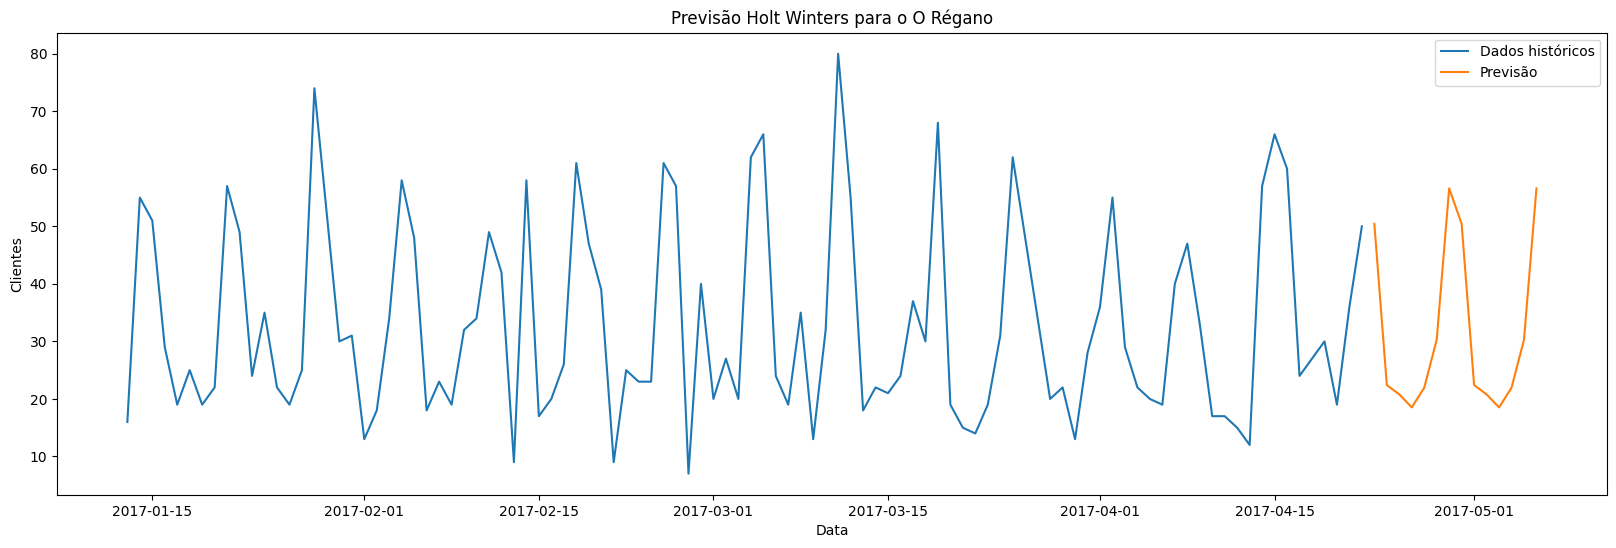

In [ ]:
plt.figure(figsize = (20,6))
plt.plot(dados['O Régano'].index[-100:], dados['O Régano'].values[-100:], label = 'Dados históricos')
plt.plot(previsao_o_regano.index, previsao_o_regano.values, label = 'Previsão')
plt.title('Previsão Holt Winters para o O Régano')
plt.xlabel('Data')
plt.ylabel('Clientes')
plt.legend();

### Atividade 2

Os gráficos de previsão de séries temporais são muito úteis na extração de insights, porém os valores exatos de cada data podem ser ainda mais relevantes para trazer uma maior precisão na análise. Sintetize os resultados da previsão em um DataFrame e exporte o resultado para um arquivo em formato excel.

In [ ]:
tabela_previsao = pd.DataFrame()
tabela_previsao.index = previsao_sal_sinha.index
tabela_previsao['Previsão Sal Sinha'] = previsao_sal_sinha.values
tabela_previsao['Previsão O Régano'] = previsao_o_regano.values
tabela_previsao = tabela_previsao.astype(int)

In [ ]:
tabela_previsao.to_excel('Tabela previsao para os próximos 14 dias.xlsx')